In [1]:
import pandas as pd

df = pd.read_json('News_Category_Dataset_v3.json',lines=True)

In [2]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [3]:
df['content'] = df['headline']+' '+df['authors']

In [4]:
df = df.dropna(subset=['content'])

In [5]:
df = df.drop(['link','short_description','date','headline','authors'], axis=1)
df.head()

,category,content
0,U.S. NEWS,Over 4 Million Americans Roll Up Sleeves For O...
1,U.S. NEWS,"American Airlines Flyer Charged, Banned For Li..."
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...
3,PARENTING,The Funniest Tweets From Parents This Week (Se...
4,U.S. NEWS,Woman Who Called Cops On Black Bird-Watcher Lo...


In [6]:
selected_categories = ["POLITICS", "WELLNESS", "ENTERTAINMENT", "TRAVEL", "STYLE & BEAUTY", "QUEER VOICES", "FOOD & DRINK", "BUSINESS", "SPORTS"]

In [7]:
df['category'] = df['category'].apply(lambda x: x if x in selected_categories else "OTHER")

In [8]:
import re

df['content'] = df['content'].apply(lambda x: re.sub(r'\b\d+\b', '<NUM>', x))

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

Count_Vectorizer = CountVectorizer()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(df['content'], df['category'], test_size=0.4, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)


In [12]:
x_train_selected = Count_Vectorizer.fit_transform(X_train)

x_test_selected = Count_Vectorizer.transform(X_test)

In [13]:
from sklearn.naive_bayes import MultinomialNB

NaiveBayes_classifier = MultinomialNB()
NaiveBayes_classifier.fit(x_train_selected, y_train)

MultinomialNB()

In [14]:
y_pred_N = NaiveBayes_classifier.predict(x_test_selected)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_N = accuracy_score(y_test, y_pred_N) * 100

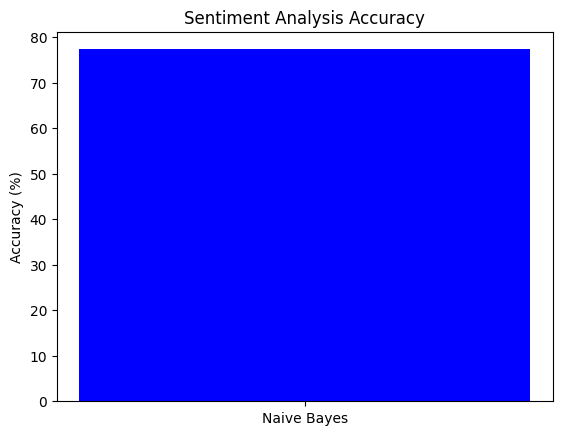

accuracy:77.30819711251641%


In [16]:
import matplotlib.pyplot as plt

plt.bar(['Naive Bayes'], [accuracy_N], color='blue')
plt.ylabel('Accuracy (%)')
plt.title('Sentiment Analysis Accuracy')
plt.show()

print(f'accuracy:{accuracy_N}%')

In [17]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')
svm_model.fit(x_train_selected, y_train)

SVC()

In [18]:
y_pred = svm_model.predict(x_test_selected)

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred) * 100

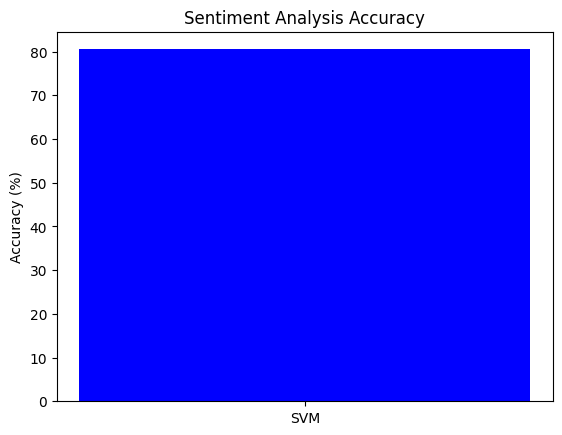

accuracy:80.52976971721752%


In [20]:
import matplotlib.pyplot as plt

plt.bar(['SVM'], [accuracy], color='blue')
plt.ylabel('Accuracy (%)')
plt.title('Sentiment Analysis Accuracy')
plt.show()

print(f'accuracy:{accuracy}%')